In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('ad_10000records.csv')


In [8]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [9]:
data = data.drop_duplicates()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   float64
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Ad Topic Line             9785 non-null   object 
 5   City                      9785 non-null   object 
 6   Gender                    9785 non-null   object 
 7   Country                   9785 non-null   object 
 8   Timestamp                 9785 non-null   object 
 9   Clicked on Ad             9785 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 840.9+ KB


In [11]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

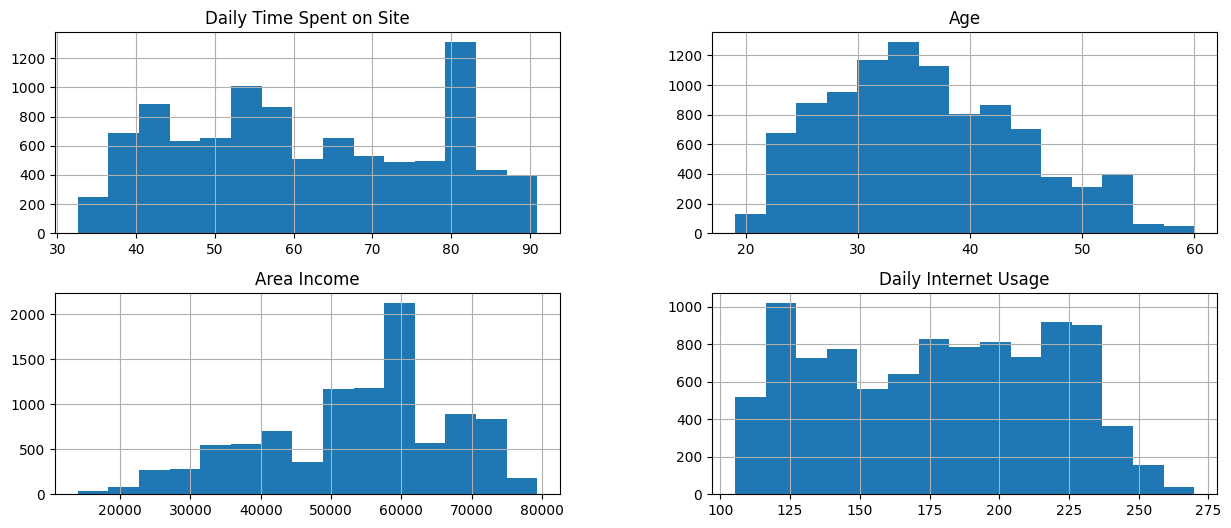

In [12]:
# Histograms for numerical features
data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.show()

In [13]:
# Summary statistics for numerical features
data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,9785.000000,9785.000000,9785.000000,9785.000000
mean,61.601379,35.839550,53948.143348,177.886144
std,15.698216,8.538524,13360.051625,40.861875
min,32.600000,19.000000,13996.500000,105.220000
25%,48.030000,29.000000,44174.250000,140.150000
50%,59.590000,35.000000,56180.930000,178.920000
75%,76.270000,41.000000,62669.590000,212.870000
max,90.970000,60.000000,79332.330000,269.960000


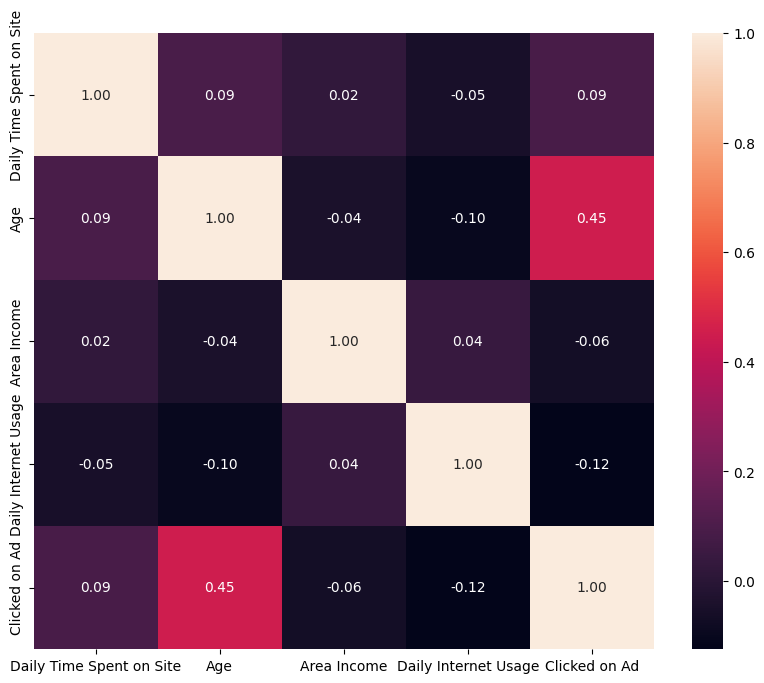

In [14]:
# Calculate correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

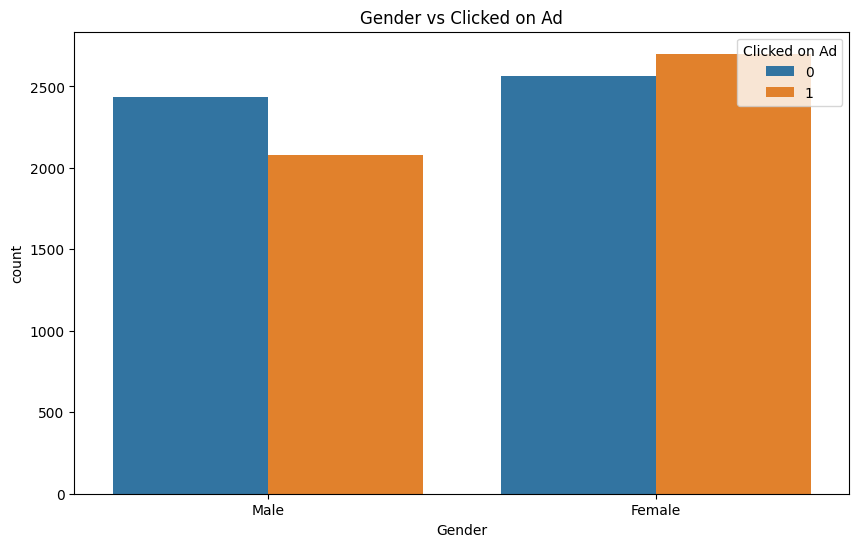

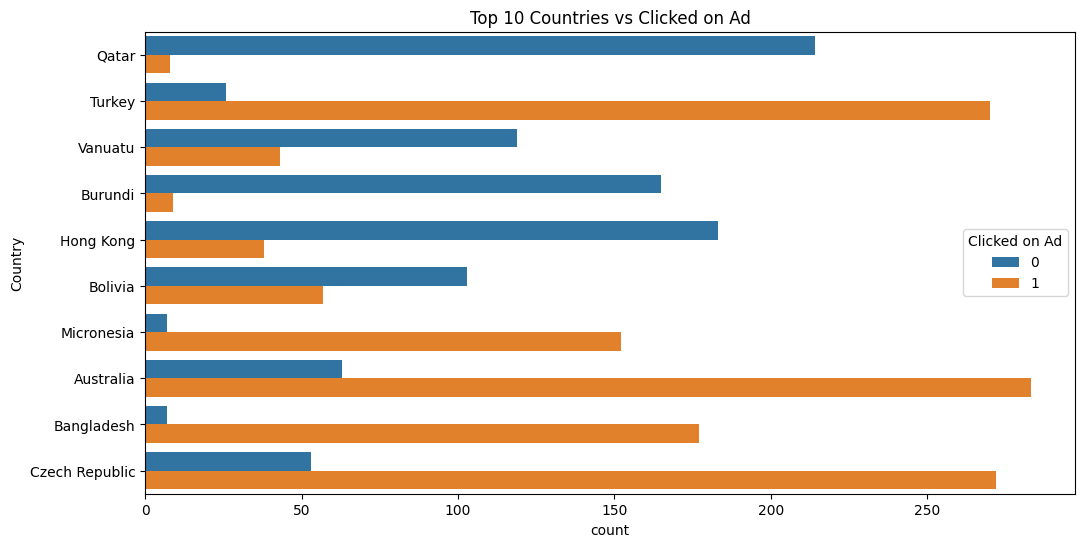

In [15]:
# Bar plot for Gender vs Clicked on Ad
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Clicked on Ad', data=data)
plt.title('Gender vs Clicked on Ad')
plt.show()

# Bar plot for Country vs Clicked on Ad (top 10 countries by count)
top_countries = data['Country'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', hue='Clicked on Ad', data=data[data['Country'].isin(top_countries)])
plt.title('Top 10 Countries vs Clicked on Ad')
plt.show()

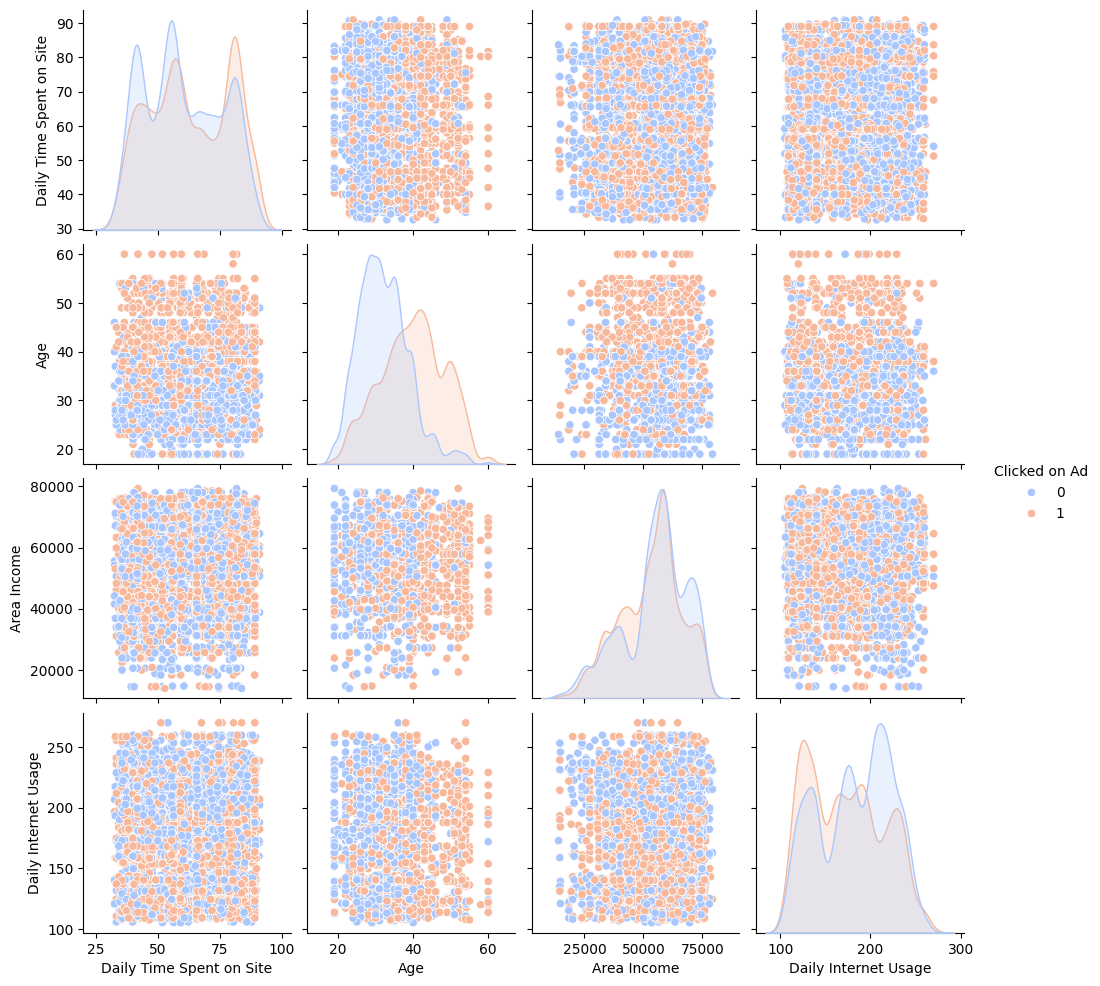

In [16]:
# Pair plot for numerical features colored by Clicked on Ad
sns.pairplot(data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']], hue='Clicked on Ad', palette='coolwarm')
plt.show()

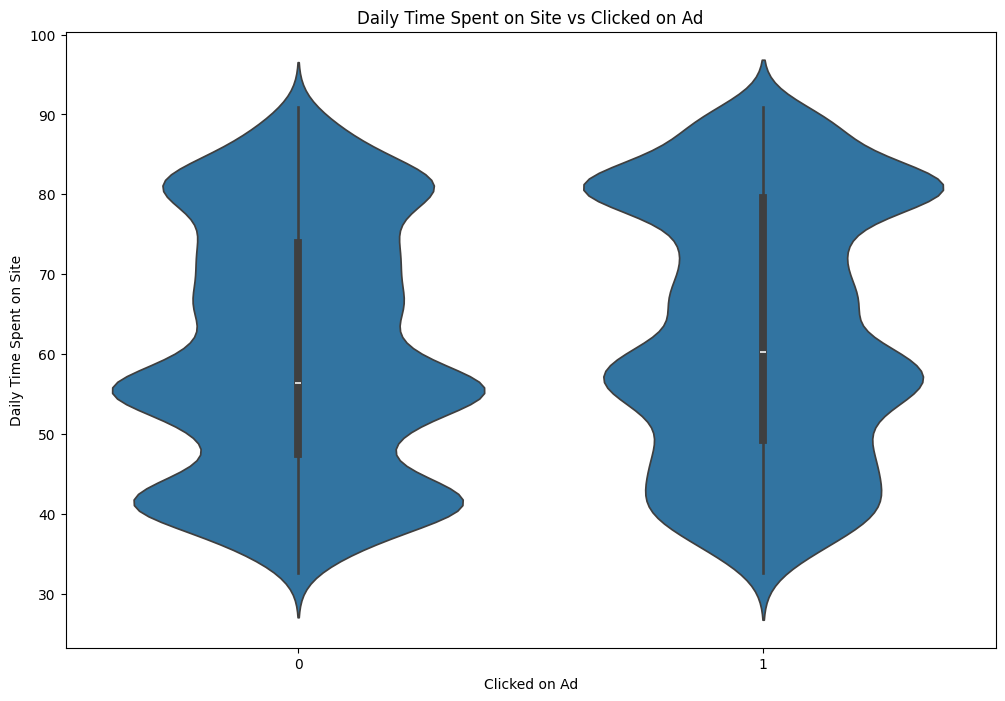

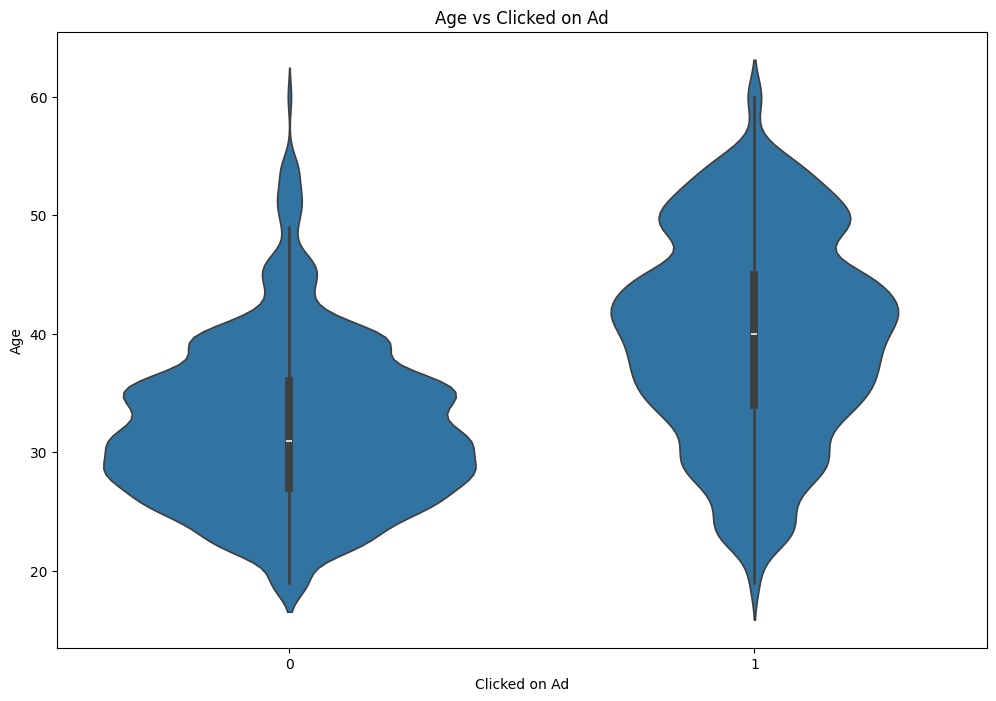

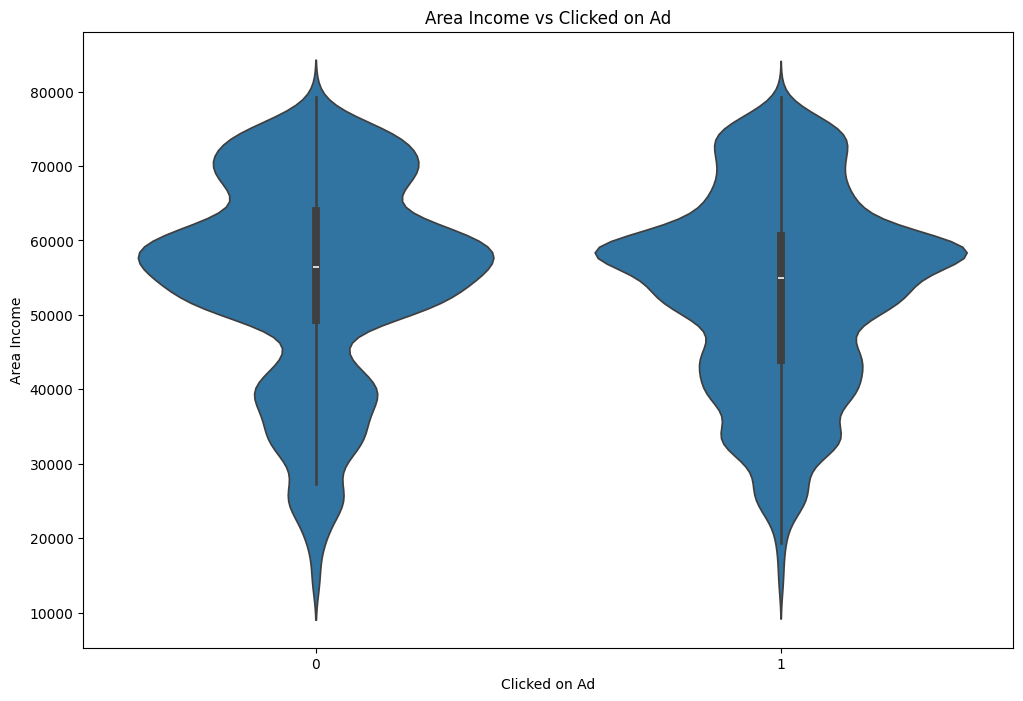

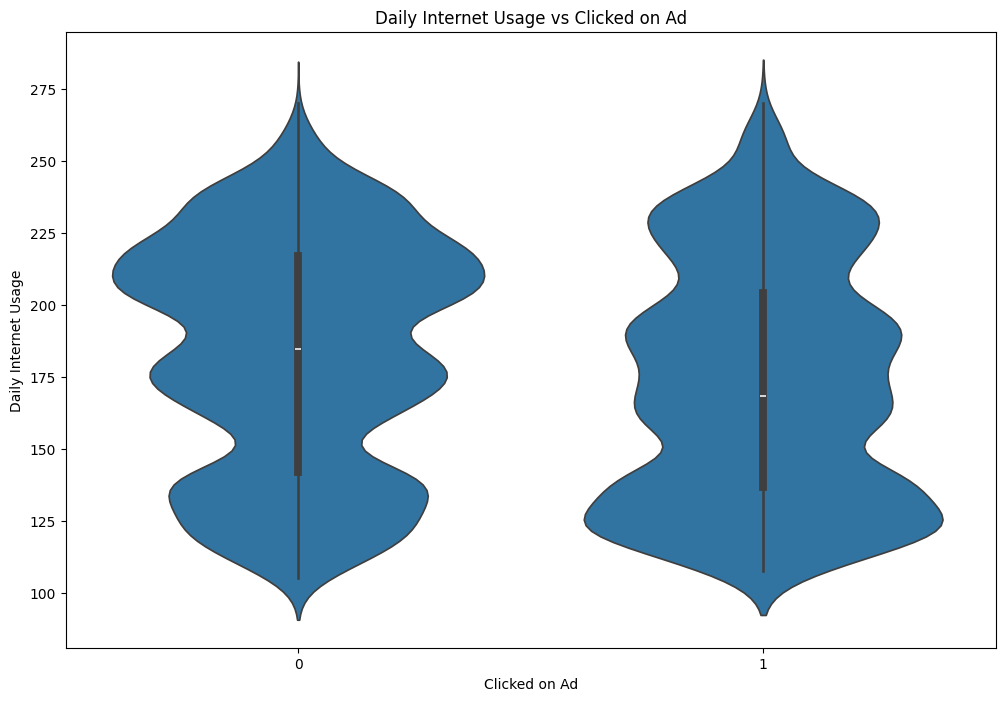

In [17]:
# Violin plots for numerical features vs Clicked on Ad
plt.figure(figsize=(12, 8))
sns.violinplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=data)
plt.title('Daily Time Spent on Site vs Clicked on Ad')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='Clicked on Ad', y='Age', data=data)
plt.title('Age vs Clicked on Ad')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='Clicked on Ad', y='Area Income', data=data)
plt.title('Area Income vs Clicked on Ad')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='Clicked on Ad', y='Daily Internet Usage', data=data)
plt.title('Daily Internet Usage vs Clicked on Ad')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10328\2862399432.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Clicked on Ad'] == 0]['Daily Time Spent on Site'], shade=True, label='Not Clicked')
C:\Users\hp\AppData\Local\Temp\ipykernel_10328\2862399432.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Clicked on Ad'] == 1]['Daily Time Spent on Site'], shade=True, label='Clicked')


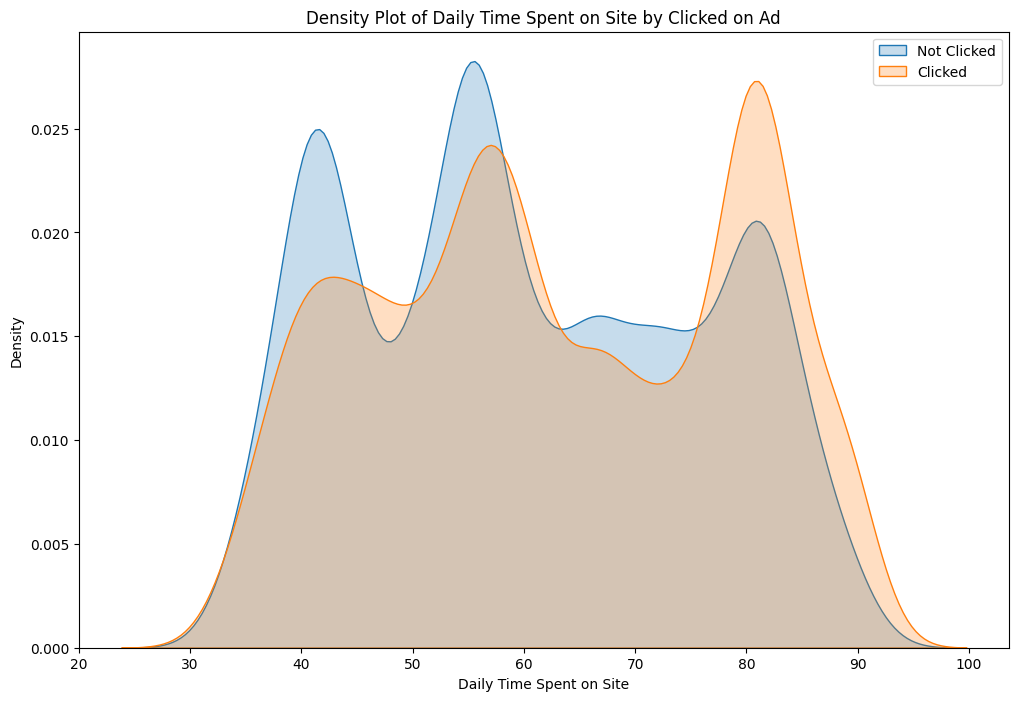

C:\Users\hp\AppData\Local\Temp\ipykernel_10328\2862399432.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Clicked on Ad'] == 0]['Age'], shade=True, label='Not Clicked')
C:\Users\hp\AppData\Local\Temp\ipykernel_10328\2862399432.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Clicked on Ad'] == 1]['Age'], shade=True, label='Clicked')


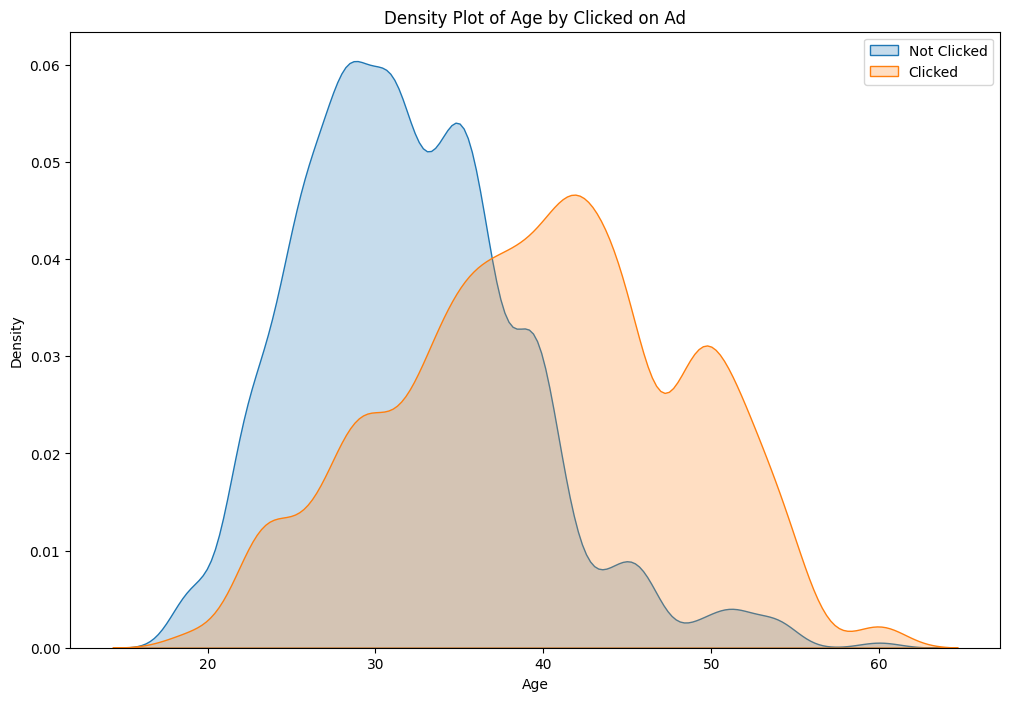

C:\Users\hp\AppData\Local\Temp\ipykernel_10328\2862399432.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Clicked on Ad'] == 0]['Area Income'], shade=True, label='Not Clicked')
C:\Users\hp\AppData\Local\Temp\ipykernel_10328\2862399432.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Clicked on Ad'] == 1]['Area Income'], shade=True, label='Clicked')


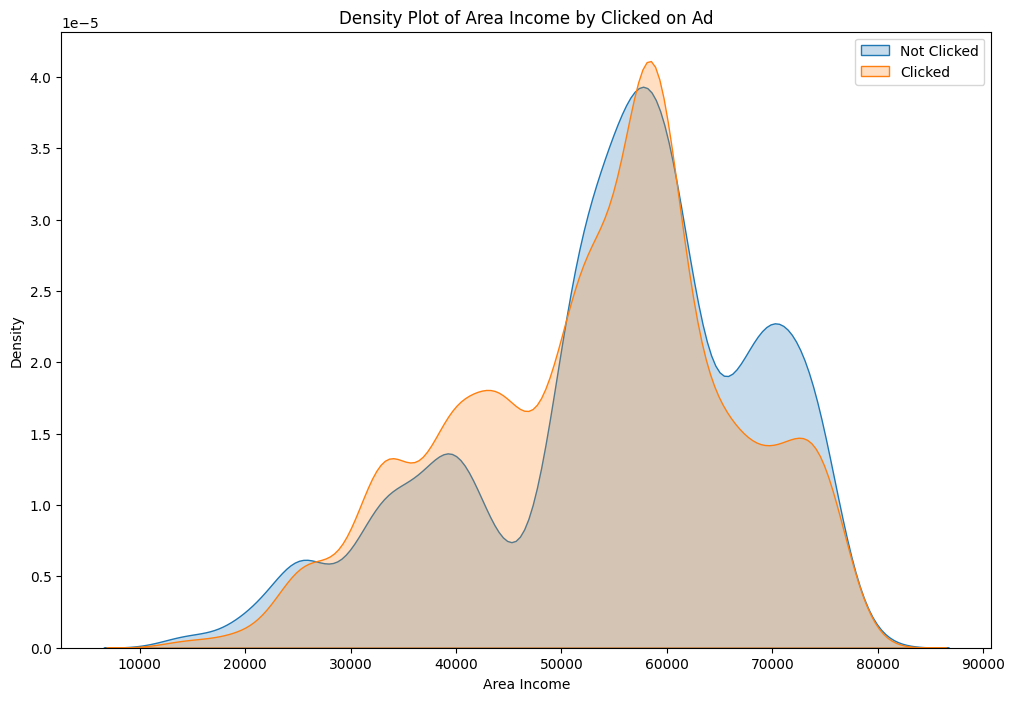

C:\Users\hp\AppData\Local\Temp\ipykernel_10328\2862399432.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Clicked on Ad'] == 0]['Daily Internet Usage'], shade=True, label='Not Clicked')
C:\Users\hp\AppData\Local\Temp\ipykernel_10328\2862399432.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Clicked on Ad'] == 1]['Daily Internet Usage'], shade=True, label='Clicked')


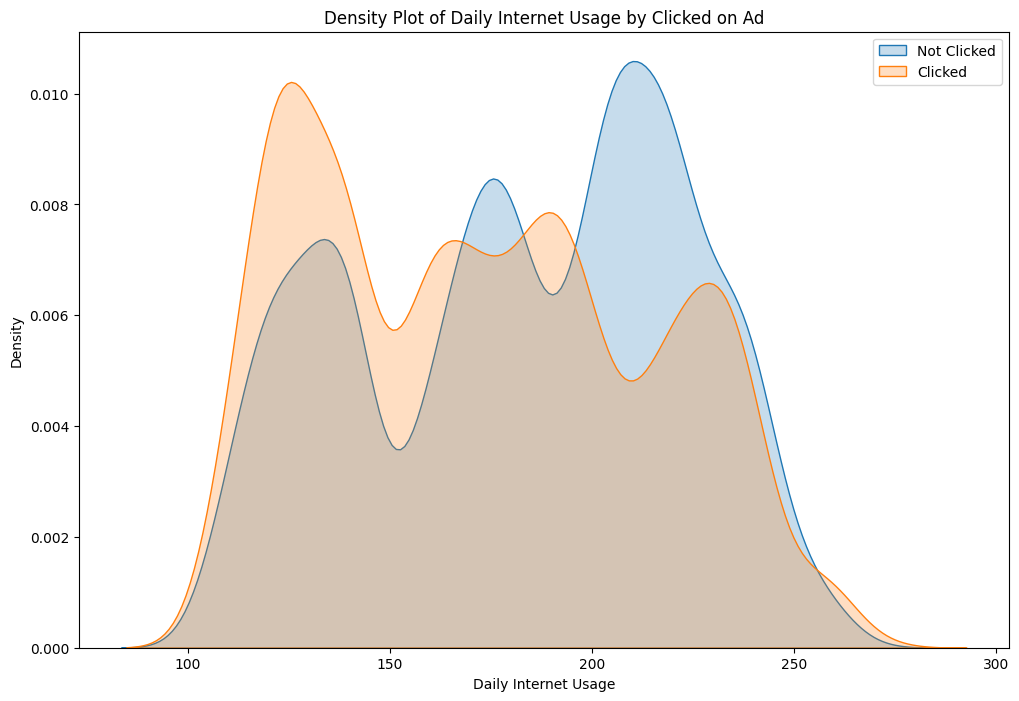

In [18]:
# Density plots for numerical features
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data[data['Clicked on Ad'] == 0]['Daily Time Spent on Site'], shade=True, label='Not Clicked')
sns.kdeplot(data=data[data['Clicked on Ad'] == 1]['Daily Time Spent on Site'], shade=True, label='Clicked')
plt.title('Density Plot of Daily Time Spent on Site by Clicked on Ad')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
sns.kdeplot(data=data[data['Clicked on Ad'] == 0]['Age'], shade=True, label='Not Clicked')
sns.kdeplot(data=data[data['Clicked on Ad'] == 1]['Age'], shade=True, label='Clicked')
plt.title('Density Plot of Age by Clicked on Ad')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
sns.kdeplot(data=data[data['Clicked on Ad'] == 0]['Area Income'], shade=True, label='Not Clicked')
sns.kdeplot(data=data[data['Clicked on Ad'] == 1]['Area Income'], shade=True, label='Clicked')
plt.title('Density Plot of Area Income by Clicked on Ad')
plt.xlabel('Area Income')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
sns.kdeplot(data=data[data['Clicked on Ad'] == 0]['Daily Internet Usage'], shade=True, label='Not Clicked')
sns.kdeplot(data=data[data['Clicked on Ad'] == 1]['Daily Internet Usage'], shade=True, label='Clicked')
plt.title('Density Plot of Daily Internet Usage by Clicked on Ad')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Density')
plt.legend()
plt.show()

In [19]:
# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract time-based features
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

In [20]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Country'] = label_encoder.fit_transform(data['Country'])

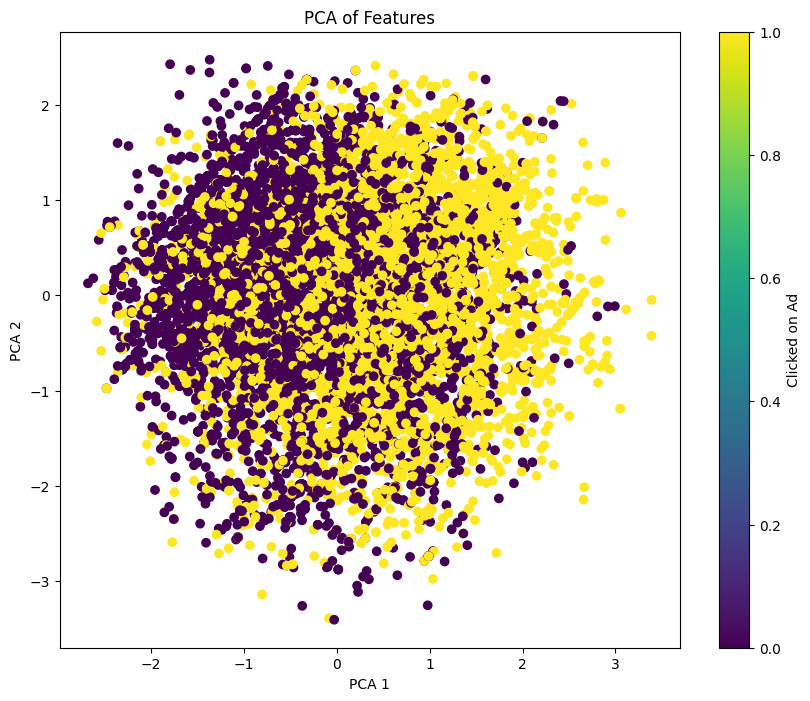

In [21]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']])

# Apply PCA
pca = PCA(n_components=4)
components = pca.fit_transform(features_scaled)

# Plot PCA
plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], c=data['Clicked on Ad'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Clicked on Ad')
plt.title('PCA of Features')
plt.show()

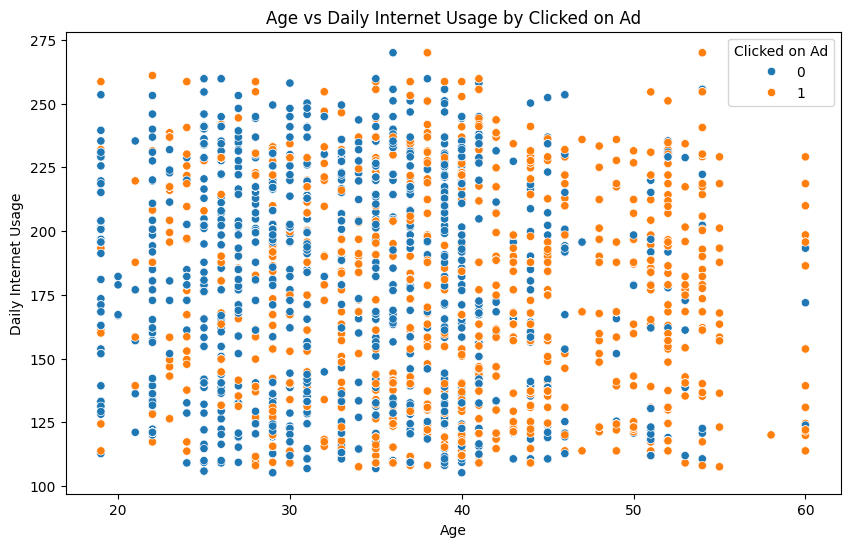

In [22]:
# Interaction: Age vs Daily Internet Usage colored by Clicked on Ad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Daily Internet Usage', hue='Clicked on Ad', data=data)
plt.title('Age vs Daily Internet Usage by Clicked on Ad')
plt.show()

In [23]:
scaler = StandardScaler()
data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']] = scaler.fit_transform(data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']])

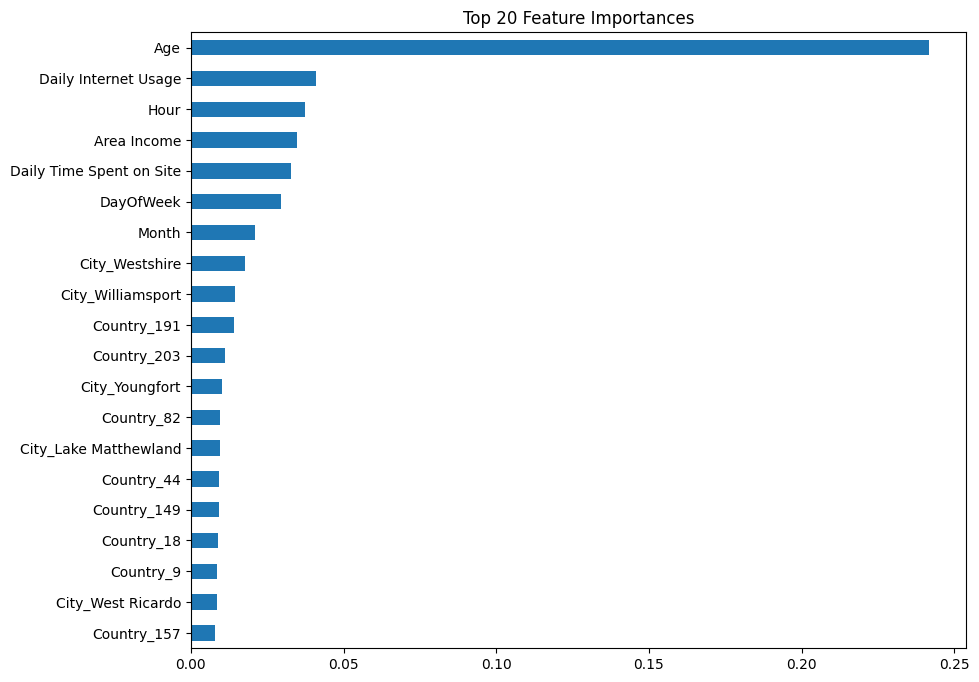

In [24]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Convert categorical variables to dummy/indicator variables (One Hot Encoding)
categorical_features = ['Ad Topic Line', 'City', 'Gender', 'Country']
data_encoded = pd.get_dummies(data, columns=categorical_features)

# Prepare features and target with the encoded dataset
X = data_encoded.drop(['Clicked on Ad', 'Timestamp'], axis=1)
y = data['Clicked on Ad']

# Initialize and fit Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Get feature importances and convert to a Series
feature_importances = pd.Series(tree.feature_importances_, index=X.columns)

# Sort the feature importances in descending order and slice the top 20
top_features = feature_importances.sort_values(ascending=False)[:20]

# Plotting
plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')  # Horizontal bar plot
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important at the top
plt.show()


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Load the data
data = pd.read_csv('ad_10000records.csv')

# Convert 'Timestamp' to datetime right away (not feature extraction yet)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Splitting data into features and target variable
X = data.drop('Clicked on Ad', axis=1)
y = data['Clicked on Ad']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function that will be used in the pipeline for transforming 'Timestamp'
def extract_date_features(df):
    df['Hour'] = df['Timestamp'].dt.hour
    df['Day'] = df['Timestamp'].dt.day
    df['Month'] = df['Timestamp'].dt.month
    df['Year'] = df['Timestamp'].dt.year
    return df.drop(['Timestamp'], axis=1)

# Preprocessor that applies different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Ad Topic Line', 'City', 'Gender', 'Country']),
        ('date', FunctionTransformer(extract_date_features, validate=False), ['Timestamp'])
    ])

# Define models
log_reg = LogisticRegression(max_iter=500)  # Increased max_iter
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Create pipelines for each model
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', log_reg)])

dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', dt)])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', rf)])

# Function to evaluate model
def evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        print(classification_report(y_test, y_pred))
        print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}')
        print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
        print(f'Cross-Validation Score: {cross_val_score(pipeline, X_train, y_train, cv=5).mean():.4f}')
        print("-"*100)

In [26]:
# Evaluate models
print("Logistic Regression Results")
evaluate_model(log_reg_pipeline, X_train, X_test, y_train, y_test)

print("Decision Tree Results")
evaluate_model(dt_pipeline, X_train, X_test, y_train, y_test)

print("Random Forest Results")
evaluate_model(rf_pipeline, X_train, X_test, y_train, y_test)

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1014
           1       0.86      0.86      0.86       986

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

ROC-AUC Score: 0.9404
Accuracy: 0.8635
Cross-Validation Score: 0.8605
----------------------------------------------------------------------------------------------------
Decision Tree Results
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1014
           1       0.82      0.84      0.83       986

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

ROC-AUC Score: 0.8316
Accuracy: 0.8315
Cross-Validation Score: 0.8135
-------------------------------------------------------

In [27]:
# Function for cross-validation
def cross_val_model(pipeline, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        scores = cross_val_score(pipeline, X, y, cv=kf)
    print('Cross-Validation Scores:', ', '.join([f'{score:.4f}' for score in scores]))
    print(f'Mean CV Score: {scores.mean():.4f}')
    print(f'Standard Deviation of CV Score: {scores.std():.4f}')
    print("-"*100)


# Evaluate models with cross-validation
print("Logistic Regression Cross-Validation")
cross_val_model(log_reg_pipeline, X, y)

print("Decision Tree Cross-Validation")
cross_val_model(dt_pipeline, X, y)

print("Random Forest Cross-Validation")
cross_val_model(rf_pipeline, X, y)

Logistic Regression Cross-Validation
Cross-Validation Scores: 0.8645, 0.8600, 0.8630, 0.8735, 0.8535
Mean CV Score: 0.8629
Standard Deviation of CV Score: 0.0065
----------------------------------------------------------------------------------------------------
Decision Tree Cross-Validation
Cross-Validation Scores: 0.8375, 0.8315, 0.8195, 0.8105, 0.8270
Mean CV Score: 0.8252
Standard Deviation of CV Score: 0.0094
----------------------------------------------------------------------------------------------------
Random Forest Cross-Validation
Cross-Validation Scores: 0.8945, 0.8820, 0.8695, 0.8755, 0.8795
Mean CV Score: 0.8802
Standard Deviation of CV Score: 0.0083
----------------------------------------------------------------------------------------------------


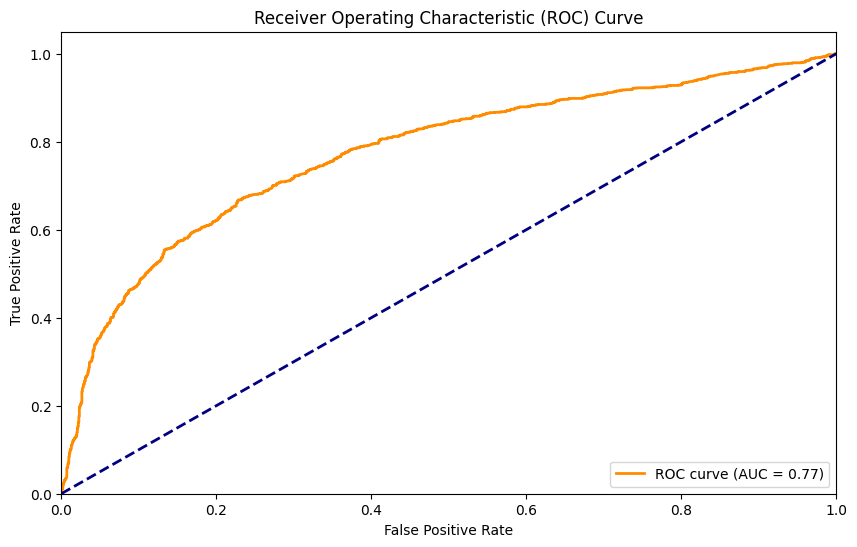

In [28]:
## Model Training & Evaluation ##
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Preprocessing
# Handle categorical features (example for 'Gender')
data_clean = data.dropna()
le = LabelEncoder()
data_clean['Gender_encoded'] = le.fit_transform(data_clean['Gender'])

# Feature selection (using numerical features)
X = data_clean[['Daily Time Spent on Site', 'Age', 'Area Income', 
               'Daily Internet Usage', 'Gender_encoded']]
y = data_clean['Clicked on Ad']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# ROC Curve Generation
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [30]:
pip install streamlit

  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached charset_normalizer-3.4.1-cp311-cp311-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 9.8/9.8 MB 61.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   --------------------------------------- 731.2/731.2 kB 15.1 MB/s eta 0:00:00
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
   ------------------

In [33]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import joblib

# Get current script directory
current_dir = os.path.dirname(os.path.abspath())
model_path = os.path.join(current_dir, 'model.pkl')

# Load model
model = joblib.load(model_path)


NameError: name '__file__' is not defined

In [31]:
# app.py
import streamlit as st
import joblib

model = joblib.load('model.pkl')
st.title('Model Demo')
features = st.text_input("Enter features (comma-separated)")
if features:
    prediction = model.predict([list(map(float, features.split(',')))])
    st.write(f"Prediction: {prediction[0]}")


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'